In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
df=pd.read_csv('nyc_housing_base.csv')
df.head()

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     34439 non-null  int64  
 1   block         34439 non-null  int64  
 2   lot           34439 non-null  int64  
 3   sale_price    34439 non-null  int64  
 4   zip_code      34423 non-null  float64
 5   borough_y     34439 non-null  object 
 6   yearbuilt     34439 non-null  float64
 7   lotarea       34439 non-null  float64
 8   bldgarea      34439 non-null  float64
 9   resarea       34251 non-null  float64
 10  comarea       34251 non-null  float64
 11  unitsres      34439 non-null  float64
 12  unitstotal    34439 non-null  float64
 13  numfloors     34396 non-null  float64
 14  latitude      34433 non-null  float64
 15  longitude     34433 non-null  float64
 16  landuse       34436 non-null  float64
 17  bldgclass     34439 non-null  object 
 18  building_age  34439 non-nu

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

borough_x       0
block           0
lot             0
sale_price      0
zip_code        0
borough_y       0
yearbuilt       0
lotarea         0
bldgarea        0
resarea         0
comarea         0
unitsres        0
unitstotal      0
numfloors       0
latitude        0
longitude       0
landuse         0
bldgclass       0
building_age    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34203 entries, 0 to 34438
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     34203 non-null  int64  
 1   block         34203 non-null  int64  
 2   lot           34203 non-null  int64  
 3   sale_price    34203 non-null  int64  
 4   zip_code      34203 non-null  float64
 5   borough_y     34203 non-null  object 
 6   yearbuilt     34203 non-null  float64
 7   lotarea       34203 non-null  float64
 8   bldgarea      34203 non-null  float64
 9   resarea       34203 non-null  float64
 10  comarea       34203 non-null  float64
 11  unitsres      34203 non-null  float64
 12  unitstotal    34203 non-null  float64
 13  numfloors     34203 non-null  float64
 14  latitude      34203 non-null  float64
 15  longitude     34203 non-null  float64
 16  landuse       34203 non-null  float64
 17  bldgclass     34203 non-null  object 
 18  building_age  34203 non-null  f

In [7]:
df = df[
    ["sale_price", "lotarea", "bldgarea", "resarea", "comarea",
     "unitsres", "unitstotal", "numfloors", "building_age", "borough_x"]
]

df.head()

,sale_price,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,building_age,borough_x
0,280000,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,125.0,1
1,2000000,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,125.0,1
2,3400000,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,105.0,1
3,4000000,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,170.0,1
4,655000,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,105.0,1


In [8]:
df.describe()

,sale_price,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,building_age,borough_x
count,3.420300e+04,3.420300e+04,3.420300e+04,3.420300e+04,3.420300e+04,34203.00000,34203.000000,34203.000000,34203.000000,34203.000000
mean,1.170607e+06,5.267808e+04,6.301169e+04,5.599618e+04,6.852613e+03,51.95553,52.550624,4.235661,84.038622,3.071543
std,1.237455e+06,5.049146e+05,2.721515e+05,2.117414e+05,6.976014e+04,173.92907,175.513630,5.242194,28.901027,1.288076
min,1.186300e+04,2.970000e+02,2.000000e+02,0.000000e+00,0.000000e+00,0.00000,0.000000,1.000000,0.000000,1.000000
25%,5.130990e+05,2.093000e+03,1.617000e+03,1.356000e+03,0.000000e+00,1.00000,1.000000,2.000000,65.000000,2.000000
50%,8.250000e+05,3.097000e+03,2.496000e+03,2.120000e+03,0.000000e+00,2.00000,2.000000,2.000000,90.000000,3.000000
75%,1.300000e+06,7.531000e+03,1.458000e+04,9.846000e+03,0.000000e+00,14.00000,15.000000,4.000000,105.000000,4.000000
max,9.995000e+06,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.00000,1906.000000,54.000000,225.000000,5.000000


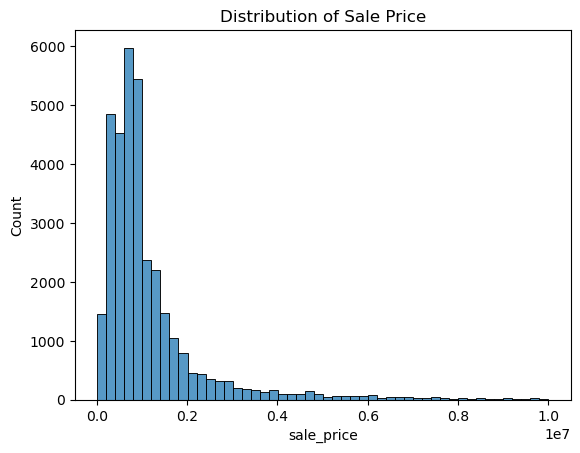

In [9]:
sns.histplot(df["sale_price"], bins=50)
plt.title("Distribution of Sale Price")
plt.show()

In [10]:
df.corr()

,sale_price,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,building_age,borough_x
sale_price,1.000000,-0.045826,-0.078054,-0.090680,-0.030443,-0.117235,-0.115833,-0.022686,0.137630,-0.193359
lotarea,-0.045826,1.000000,0.654924,0.670589,0.519563,0.694728,0.695480,0.200897,-0.048297,0.051227
bldgarea,-0.078054,0.654924,1.000000,0.989119,0.897795,0.933061,0.934121,0.606426,-0.126557,-0.029514
resarea,-0.090680,0.670589,0.989119,1.000000,0.824000,0.968739,0.969212,0.633714,-0.133921,-0.044791
comarea,-0.030443,0.519563,0.897795,0.824000,1.000000,0.700238,0.702920,0.439552,-0.086748,0.021282
unitsres,-0.117235,0.694728,0.933061,0.968739,0.700238,1.000000,0.999921,0.630526,-0.139967,-0.052836
unitstotal,-0.115833,0.695480,0.934121,0.969212,0.702920,0.999921,1.000000,0.632438,-0.139603,-0.054003
numfloors,-0.022686,0.200897,0.606426,0.633714,0.439552,0.630526,0.632438,1.000000,-0.142319,-0.313793
building_age,0.137630,-0.048297,-0.126557,-0.133921,-0.086748,-0.139967,-0.139603,-0.142319,1.000000,-0.179352
borough_x,-0.193359,0.051227,-0.029514,-0.044791,0.021282,-0.052836,-0.054003,-0.313793,-0.179352,1.000000


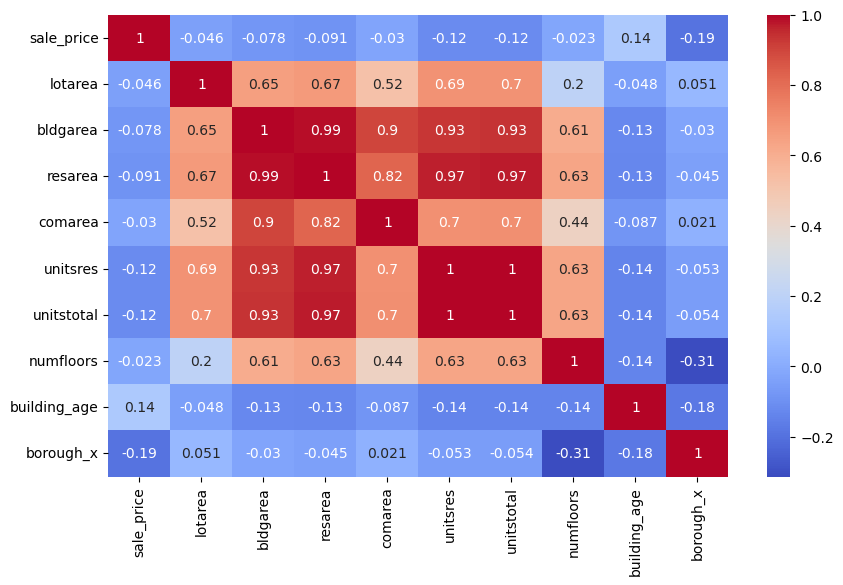

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Building area, residential units, and location had the strongest correlation with sale price

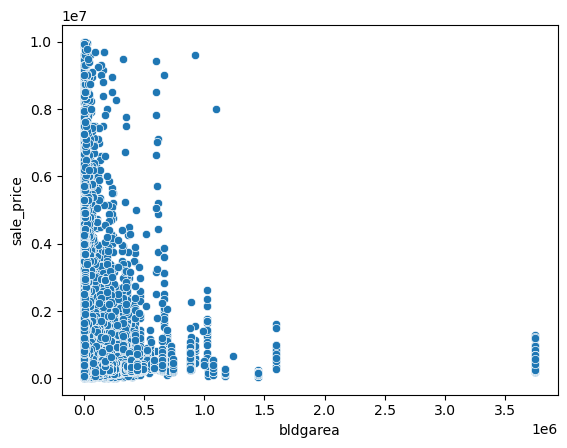

In [12]:
sns.scatterplot(x="bldgarea", y="sale_price", data=df)
plt.show()

In [13]:
df["age_squared"] = df["building_age"] ** 2

In [14]:
df["price_per_sqft"] = df["sale_price"] / df["bldgarea"]

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("sale_price", axis=1)
y = df["sale_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


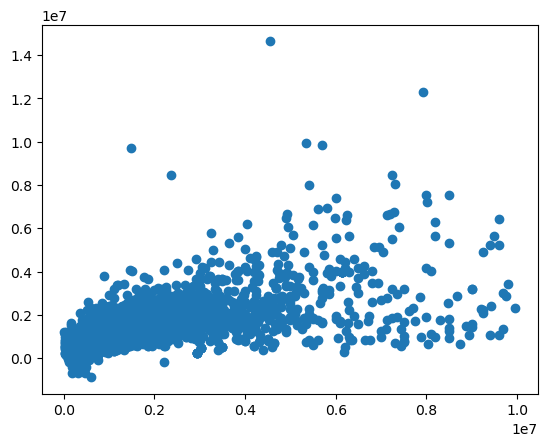

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
plt.scatter(y_test, lr_pred)
plt.show()


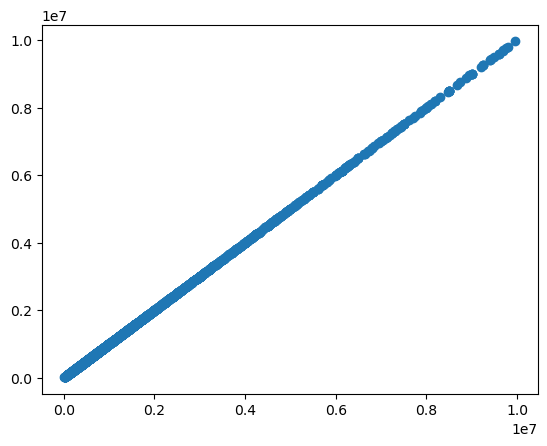

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

poly_pred = lr_poly.predict(X_test_poly)

plt.scatter(y_test, poly_pred)
plt.show()

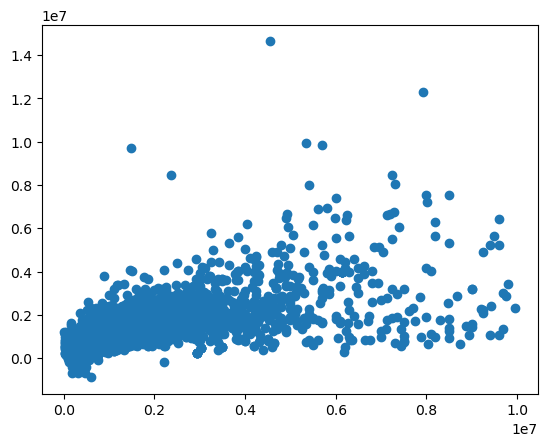

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

plt.scatter(y_test, ridge_pred)
plt.show()


d:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+16, tolerance: 4.138e+12
  model = cd_fast.enet_coordinate_descent(


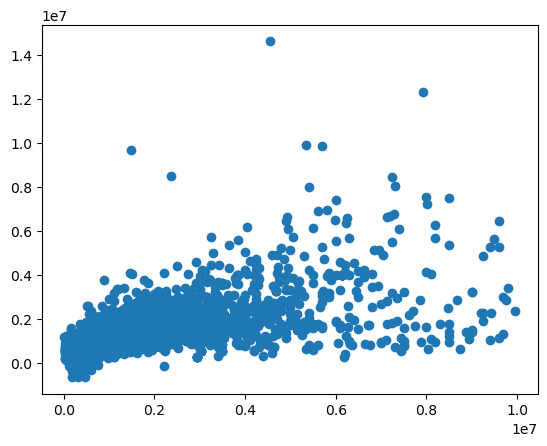

In [19]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

plt.scatter(y_test, lasso_pred)
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

models = {
    "Linear": lr_pred,
    "Polynomial": poly_pred,
    "Ridge": ridge_pred,
    "Lasso": lasso_pred
}

for name, pred in models.items():
    rmse, mae = evaluate(y_test, pred)
    print(f"{name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear → RMSE: 961413.30, MAE: 529628.39
Polynomial → RMSE: 0.00, MAE: 0.00
Ridge → RMSE: 961413.41, MAE: 529625.18
Lasso → RMSE: 965415.10, MAE: 532267.05


In [21]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df


,Feature,Coefficient
6,numfloors,45828.215991
5,unitstotal,38933.850440
10,price_per_sqft,1388.448024
9,age_squared,135.268717
1,bldgarea,2.880188
0,lotarea,0.156928
2,resarea,-0.399881
3,comarea,-5.766682
7,building_age,-17881.354969
4,unitsres,-42256.326799


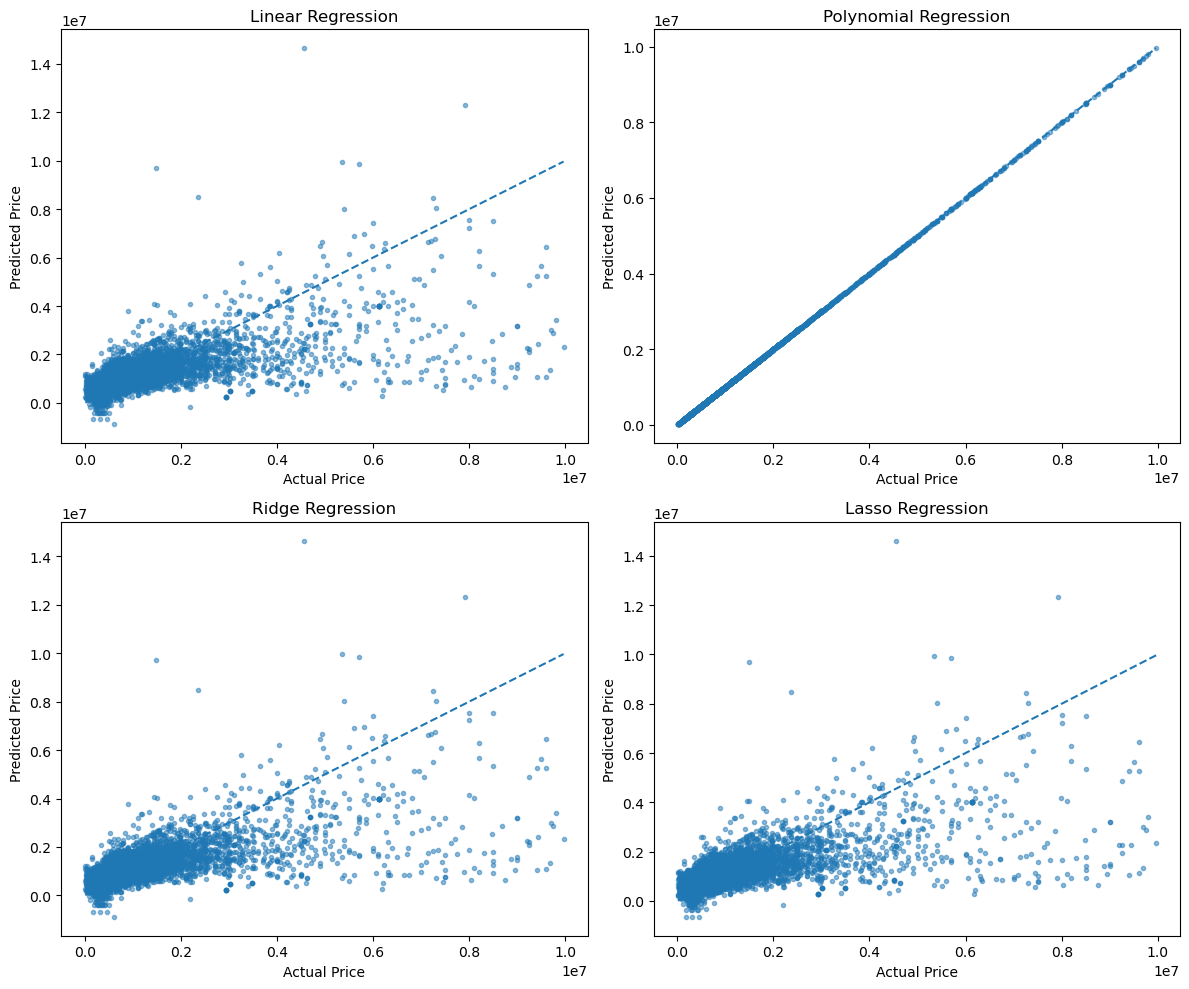

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

models = [
    ("Linear Regression", lr_pred),
    ("Polynomial Regression", poly_pred),
    ("Ridge Regression", ridge_pred),
    ("Lasso Regression", lasso_pred)
]

for i, (name, pred) in enumerate(models, 1):
    plt.subplot(2, 2, i)
    
    # Scatter (dotted)
    plt.scatter(y_test, pred, alpha=0.5, marker=".")
    
    # Perfect prediction line
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        linestyle="--"
    )
    
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(name)

plt.tight_layout()
plt.show()


In [23]:
# Baseline: predict mean price
baseline_pred = np.full_like(y_test, y_train.mean())

baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
model_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Baseline RMSE:", baseline_rmse)
print("Ridge RMSE:", model_rmse)


Baseline RMSE: 1267485.5764952905
Ridge RMSE: 961413.4130094982


In [24]:
train_pred = ridge.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)


Train RMSE: 921919.6011633293
Test RMSE : 961413.4130094982


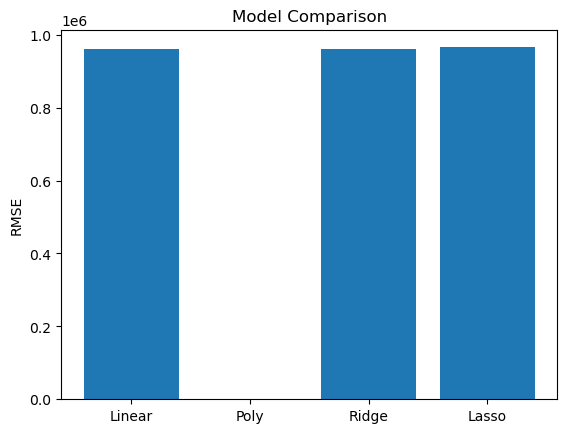

In [25]:
rmse_values = [
    np.sqrt(mean_squared_error(y_test, lr_pred)),
    np.sqrt(mean_squared_error(y_test, poly_pred)),
    np.sqrt(mean_squared_error(y_test, ridge_pred)),
    np.sqrt(mean_squared_error(y_test, lasso_pred))
]

plt.figure()
plt.bar(["Linear", "Poly", "Ridge", "Lasso"], rmse_values)
plt.ylabel("RMSE")
plt.title("Model Comparison")
plt.show()
